<a href="https://colab.research.google.com/github/vponkia/LoanApprovalPrediction/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !git clone https://github.com/vponkia/LoanApprovalPrediction.git

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML/Project/LoanPrediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print('Number of rows are 614 and columns are 12')
df.shape

Number of rows are 614 and columns are 12


(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Treating Null values

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Most frequently occurring value for Gender, Married, Dependents, Self_Employed, Loan_Amount_Term and Credit_History for categorical feature are

In [8]:
print("Gender",df["Gender"].mode())
print("Married",df["Married"].mode())
print("Dependents",df["Dependents"].mode())
print("Self_Employed",df["Self_Employed"].mode())
print("Loan_Term",df["Loan_Amount_Term"].mode())
print("Credit_History",df["Credit_History"].mode())

Gender 0    Male
Name: Gender, dtype: object
Married 0    Yes
Name: Married, dtype: object
Dependents 0    0
Name: Dependents, dtype: object
Self_Employed 0    No
Name: Self_Employed, dtype: object
Loan_Term 0    360.0
Name: Loan_Amount_Term, dtype: float64
Credit_History 0    1.0
Name: Credit_History, dtype: float64


Filling in the missing values with the most common category in the dataset for categorical feature

In [9]:
df["Gender"].replace(np.nan,"Male",inplace=True)

In [10]:
df["Married"].replace(np.nan,"Yes",inplace=True)

In [11]:
df["Self_Employed"].replace(np.nan,"No",inplace=True)

In [12]:
df["Dependents"].replace(np.nan,0.0,inplace=True)

In [13]:
df["Loan_Amount_Term"].replace(np.nan,360.0,inplace=True)

In [14]:
df["Credit_History"].replace(np.nan,1.0,inplace=True)

Filling in the missing values with mean for numeric value

In [15]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)

In [16]:
print('No more missing values')
df.isnull().sum()

No more missing values


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
df = df.drop(['Loan_ID'],axis =1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Eligibility for loan based on gender that is
Males are taking more loan than Females.

<Axes: xlabel='Gender', ylabel='count'>

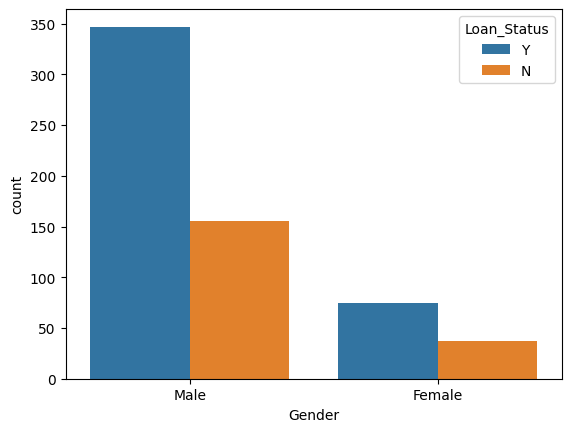

In [19]:
sns.countplot(x ='Gender',hue = 'Loan_Status',data = df)

The person who is graduated are more capable to get loan compared to undergraduated.

<Axes: xlabel='Education', ylabel='count'>

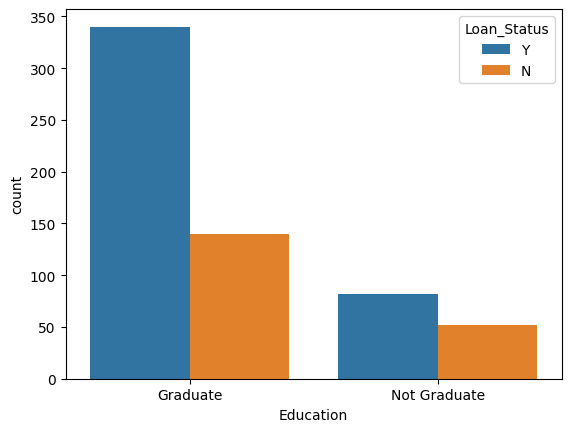

In [20]:
sns.countplot(x ='Education',hue = 'Loan_Status',data = df)

The Married people are taking loan more than unmarried people.

<Axes: xlabel='Married', ylabel='count'>

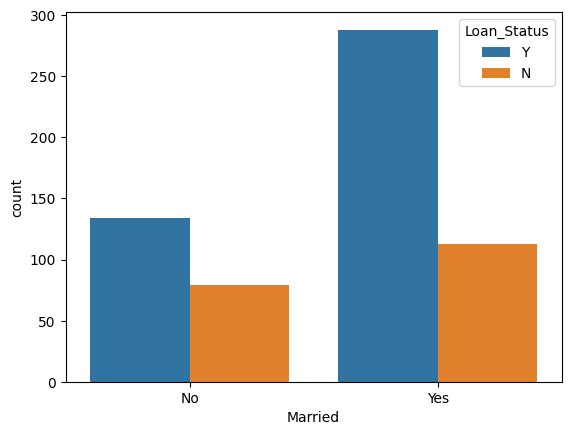

In [21]:
sns.countplot(x ='Married',hue = 'Loan_Status',data = df)

Independent are more likely to get loan then dependents.

<Axes: xlabel='Dependents', ylabel='count'>

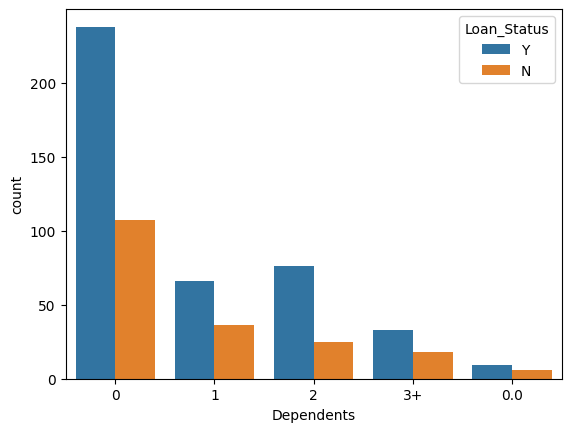

In [22]:
sns.countplot(x ='Dependents',hue = 'Loan_Status',data = df)

The person who have good credit history are capable to get loan

<Axes: xlabel='Credit_History', ylabel='count'>

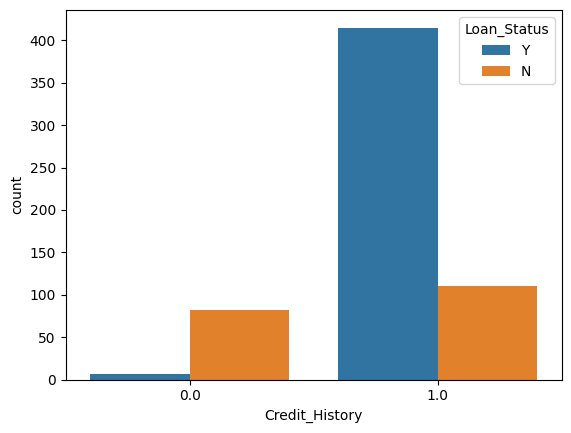

In [23]:
sns.countplot(x ='Credit_History',hue = 'Loan_Status',data = df)

Converting categorical value to numerical value

In [24]:
df['Married']=df['Married'].replace({'Yes':1,'No':0}).astype(int)
df['Self_Employed']=df['Self_Employed'].replace({'Yes':1,'No':0}).astype(int)
df['Gender']=df['Gender'].replace({'Male':1,'Female':0}).astype(int)
df['Dependents']=df['Dependents'].replace({'0': 0, '1': 1 ,'2': 2 ,'3+': 3}).astype(int)
df['Education']=df['Education'].replace({'Graduate': 1, 'Not Graduate': 0}).astype(int)
df['Property_Area']=df['Property_Area'].replace({'Urban': 0, 'Rural': 1 ,'Semiurban': 2}).astype(int)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,Y
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,N
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,Y
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,Y
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,Y


Credit history is more correlated with target column(Loan_status).

<ipython-input-25-3454e96ec167>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

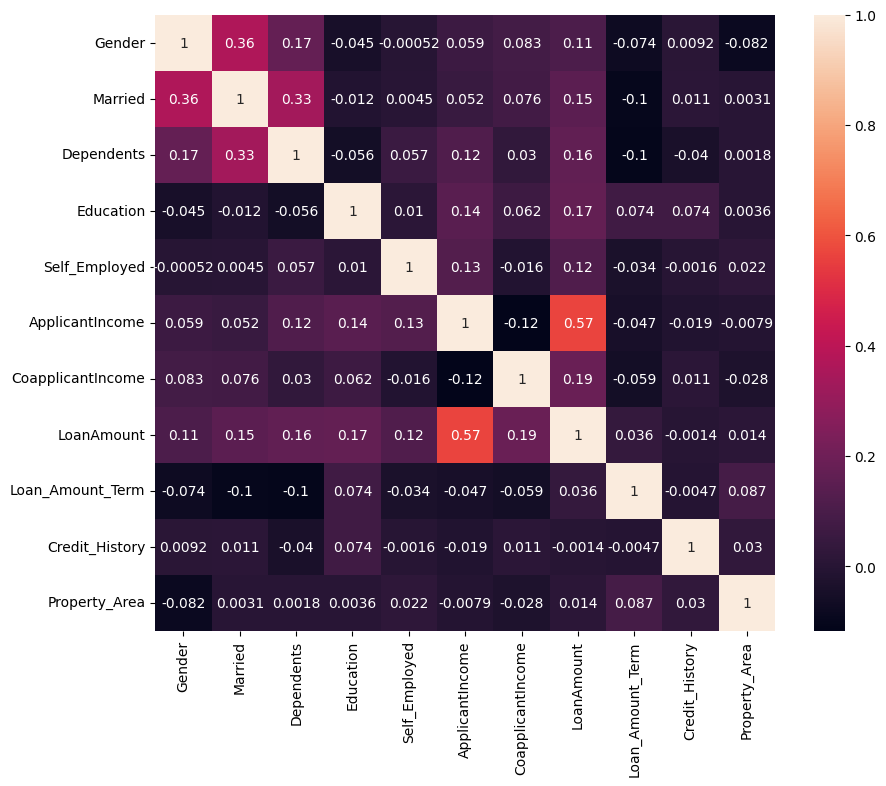

In [25]:
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Feature and target

In [26]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [27]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0


In [28]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

Train-test split

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(491, 11)
(123, 11)
(491,)
(123,)


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [34]:
# models = []
# models.append(('Logistic Regression', LogisticRegression()))
# models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
# models.append(('K Nearest Neighbors', KNeighborsClassifier()))
# models.append(('Decision Tree', DecisionTreeClassifier()))
# models.append(('Gaussian Naive Bayes', GaussianNB()))
# models.append(('Random Forest', RandomForestClassifier()))
# # models.append(('Support Vector', SVC())

In [37]:
# for name,algorithm in models:
#     model= algorithm
#     model.fit(xtrain, ytrain)
#     prediction = model.predict(xtest)
#     print('The accuracy of the %s is %f:'%(name,accuracy_score(prediction,ytest)))
# print('\n')

Standardizing the data

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(xtrain)
X_test_scaled = sc.transform(xtest)

### Logistic Regression

Applying Logistic Regression

In [48]:
model = LogisticRegression()
LR = model.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
y_pred_prob = LR.predict_proba(xtest)

In [52]:
y_pred = LR.predict(xtest)

In [53]:
df = pd.DataFrame({"Prob_class_0": y_pred_prob[:,0], "Prob_class_1": y_pred_prob[:,1], "Predicted class": y_pred})
df

,Prob_class_0,Prob_class_1,Predicted class
0,0.149354,0.850646,Y
1,0.168645,0.831355,Y
2,0.352962,0.647038,Y
3,0.245697,0.754303,Y
4,0.145956,0.854044,Y
...,...,...,...
118,0.263705,0.736295,Y
119,0.270792,0.729208,Y
120,0.188755,0.811245,Y
121,0.762193,0.237807,N


In [55]:
Accuracy = np.mean(y_pred == ytest) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 84.55


In [56]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(ytest, y_pred)
conf_mat

array([[15, 18],
       [ 1, 89]])

In [57]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

<Axes: >

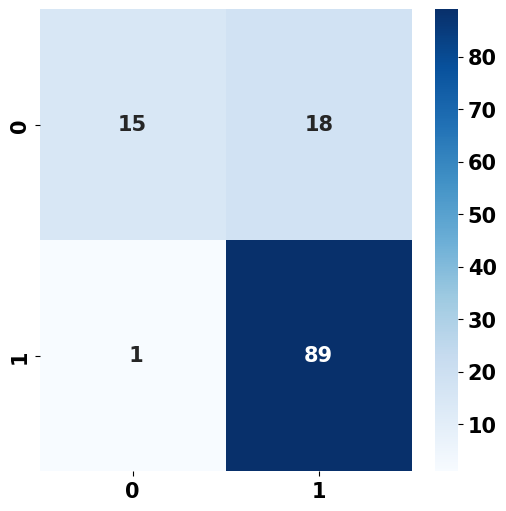

In [60]:
plt.figure(figsize = (6,6))
sns.heatmap(conf_mat, annot = True, fmt ='2g', cmap = 'Blues', annot_kws = {"size":15})

In [62]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(ytest, y_pred, normalize=True)]
,"Precision":[precision_score(ytest, y_pred, average = 'macro')]
,"Recall":[recall_score(ytest, y_pred, average = 'macro')]
,"F1-Score":[f1_score(ytest, y_pred, average = 'macro')]})

Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.845528,0.884638,0.721717,0.757899


### KNN

Applying KNN Classifier

In [63]:
knn = KNeighborsClassifier()

In [64]:
knn.fit(X_train_scaled, ytrain)
y_pred = knn.predict(X_test_scaled)

In [65]:
Accuracy = np.mean(y_pred == ytest) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 77.24


In [68]:
Error_Rate = []

for i in range(1,30):

    knn_opt = KNeighborsClassifier(n_neighbors = i)
    knn_opt.fit(X_train_scaled,ytrain)
    y_pred_opt = knn_opt.predict(X_test_scaled)
    Accuracy = np.mean(y_pred_opt == ytest)
    error_rate_value = 1 - Accuracy
    Error_Rate.append(error_rate_value)


Text(0, 0.5, 'Error Rate')

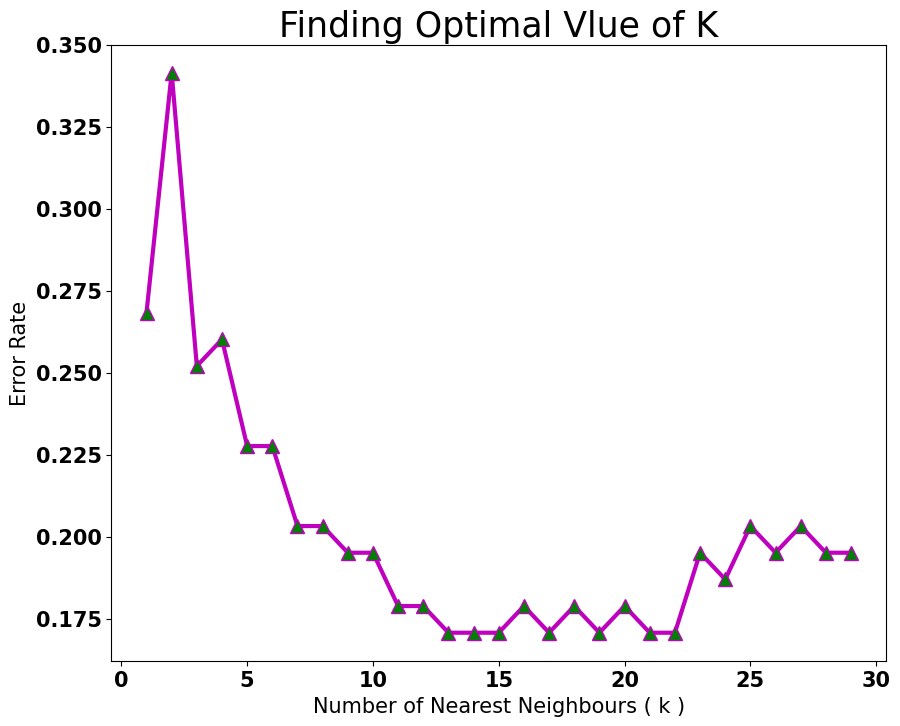

In [69]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 30), Error_Rate, 'm', lw = 3,  marker ='^', markerfacecolor ='g', markersize = 10)
plt.title('Finding Optimal Vlue of K', fontsize = 25)
plt.xlabel('Number of Nearest Neighbours ( k )', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

In [70]:
knn_13 = KNeighborsClassifier(n_neighbors = 13)

In [72]:
knn_13.fit(X_train_scaled, ytrain)
y_pred_13 = knn_13.predict(X_test_scaled)

In [73]:
Accuracy = np.mean(y_pred_13 == ytest) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 82.93


### Random forest

In [79]:
rf = RandomForestClassifier()

In [82]:
rf.fit(X_train_scaled, ytrain)
y_predRF = rf.predict(X_test_scaled)

In [83]:
Accuracy = np.mean(y_predRF == ytest) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 79.67
